# **Prueba de Hipótesis**


## Test de Normalidad Shapiro-Wilk

### El test de Shapiro-Wilk prueba la hipótesis nula de que los datos se extrajeron de una distribución normal.

Supuestos: Las observaciones en cada muestra son independientes e idénticamente distribuidas (iid).

In [ ]:
# Importación de librería
from scipy.stats import shapiro

Se establecen las hipótesis:

*   H0  : La distribución es normal.
*   Ha  : La distribución no es normal.


Ahora el test Shapiro-Wilks intenta rechazar la hipotesis nula al nivel de significanza 0.05.


In [ ]:
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.895, p=0.193


In [ ]:
if p > 0.05:
	print('Distribución Normal')
else:
	print('Distribución NO Normal')

Distribución Normal


Como el p-value > 0.05 **no se rechaza** la hipótesis nula, por lo no se rechaza la hipótesis que los datos provienen de una distribución normal.

*Nota:* en la práctica, para este test, si para un conjunto de datos SE rechaza la hipótesis nula, habría que verificar inicialmente la forma de su histograma y que el valor de la media y mediana sean bastante similares. Ya que puede deberse que la muestra no sea significativa debido a que son muy pocos datos, lo que significa que no es concluyente el rechazo en su totalidad para este test en muestras pequeñas.

---



# Normal Estándar

Para generar la curva de la función Normal Estándar se usará la función norm.pdf que calcula la función de densidad de probabilidad en la librería de scipy.stats.

In [ ]:
# Importar las librerías
import numpy as np
import matplotlib.pyplot as pyplot
from scipy.stats import norm

In [ ]:
# Eje x va entre -4 y 4 ; con 0.1 de salto
x_axis = np.arange(-4, 4, 0.1)  

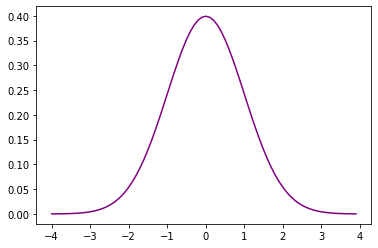

In [ ]:
# Media = 0 y SD = 1
pyplot.plot(x_axis, norm.pdf(x_axis, 0, 1), color='purple')
pyplot.show()

---

# Prueba T - Student

Se busca conocer si las evaluaciones de los maestros en una Universidad difiere por género.

In [1]:
# Importar las librerías
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats 

In [2]:
# Importar la base de evaluaciones de maestros.
df = pd.read_csv('sample_data/M4C4_Eval_maestros.csv')
df.head()

,ID,age,gender,credits,beauty,eval,students,allstudents,prof,female,single_credit,upper_division,English_speaker,tenured_prof
0,1,36,female,more,0.289916,4.3,24,43,1,1,0,1,1,1
1,2,36,female,more,0.289916,3.7,86,125,1,1,0,1,1,1
2,3,36,female,more,0.289916,3.6,76,125,1,1,0,1,1,1
3,4,36,female,more,0.289916,4.4,77,123,1,1,0,1,1,1
4,5,59,male,more,-0.737732,4.5,17,20,2,0,0,1,1,1


In [5]:
df.shape

(450, 14)

El tamaño de muestra es pequeño, 450 registros de evaluaciones.

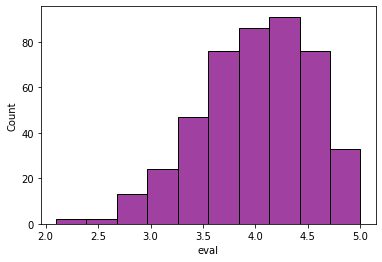

In [ ]:
# Distribución de las evaluaciones, ¿es normal?
sns.histplot(df['eval'], bins=10, color='purple')

Supuestos:

*   Escala de medición continua: Ok
*   Muestras aleatorias simples: Ok
*   Distribución normal: Ok
*   Homogeneidad de la varianza: Ok


In [ ]:
# Obtención del promedio por género
avg_gen = df.groupby(['gender'])['eval'].mean().reset_index(name='avg_eval')
avg_gen

,gender,avg_eval
0,female,3.928877
1,male,4.073004


[Text(0.5, 1.0, 'Promedio de evaluación por género')]

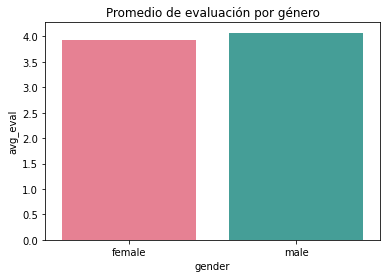

In [ ]:
# Representación visual del promedio de evaluación por mujeres y hombres.
sns.barplot(x='gender',y='avg_eval', data=avg_gen,  palette = 'husl').set(title='Promedio de evaluación por género')

La media por grupo es de alrededor de 4. Sin embargo la diferencia es muy pequeña. ¿Es significativa la diferencia?

Se establecen las hipótesis:

*   H0  : No hay diferencia en la evaluación para mujeres y hombres.
*   Ha  : Existe una diferencia en la evaluación para mujeres y hombres.

Ahora la prueba T intenta rechazar la hipotesis nula al nivel de significanza alpha = 0.05.


In [ ]:
# La función toma las dos muestras que se está tratando probar
scipy.stats.ttest_ind(df[df['gender'] == 'female']['eval'] , 
                      df[df['gender'] == 'male']['eval'])

Ttest_indResult(statistic=-2.7699121671550855, pvalue=0.005840127511042723)

Como el p-value < 0.05 **se rechaza** la hipótesis nula, ya que existe suficiente evidencia de que existe una diferencia estadística en las evaluaciones de maestros en función del género.



---

# Estandarización

In [ ]:
# Importar las librerías
import pandas as pd
import scipy.stats 

In [ ]:
# Importar la base de evaluaciones de maestros.
df = pd.read_csv('sample_data/Eval_maestros.csv')
df.head()

,ID,age,gender,credits,beauty,eval,students,allstudents,prof,female,single_credit,upper_division,English_speaker,tenured_prof
0,1,36,female,more,0.289916,4.3,24,43,1,1,0,1,1,1
1,2,36,female,more,0.289916,3.7,86,125,1,1,0,1,1,1
2,3,36,female,more,0.289916,3.6,76,125,1,1,0,1,1,1
3,4,36,female,more,0.289916,4.4,77,123,1,1,0,1,1,1
4,5,59,male,more,-0.737732,4.5,17,20,2,0,0,1,1,1


In [ ]:
# Encontrar la media y la desviación estándard
eval_avg = round(df['eval'].mean(),2)
eval_sd = round(df['eval'].std(),2)
print(eval_avg,eval_sd)

4.01 0.55


In [ ]:
# Eval estadarizada
df['eval_stand'] = (df['eval'] - eval_avg)/eval_sd


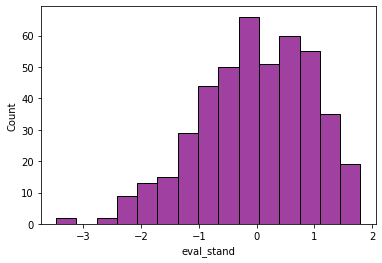

In [ ]:
# Distribución de las evaluaciones estandarizada
sns.histplot(df['eval_stand'], bins=15, color='purple')

Usando la librería de scipy.stats con la función norm.cdf (cdf: función de distribución acumulada), encontrar el valor de la probabilidad.

¿Cuál es la probabilidad de obtener una calificación mayor a 4.5?

In [ ]:
prob0 = scipy.stats.norm.cdf(( 4.5 - eval_avg) / eval_sd)  # Área bajo la curva de obtener un score < 4.5
print(1-round(prob0,4))                                    # Complemento de la distr. para obtener un score >= 4.5

0.1865
